# PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET 




# STEP #0: PROBLEM STATEMENT

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 

- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [2]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)


# STEP #2: EXPLORING THE DATASET  

In [4]:
# Let's view the head of the training dataset
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
# Let's view the last elements in the training dataset
chicago_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


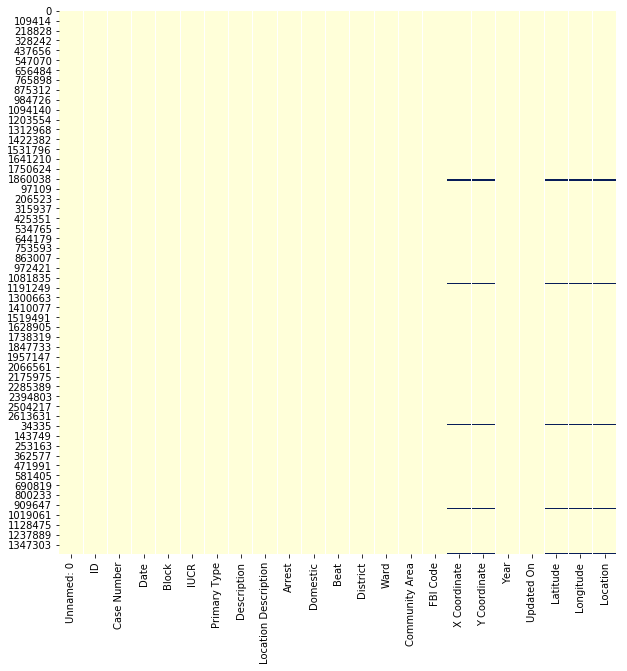

In [6]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [7]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 
                 'X Coordinate', 'Y Coordinate','Updated On','Year', 
                 'FBI Code', 'Beat','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [8]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [9]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [42]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [11]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [12]:
chicago_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [13]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [14]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [15]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

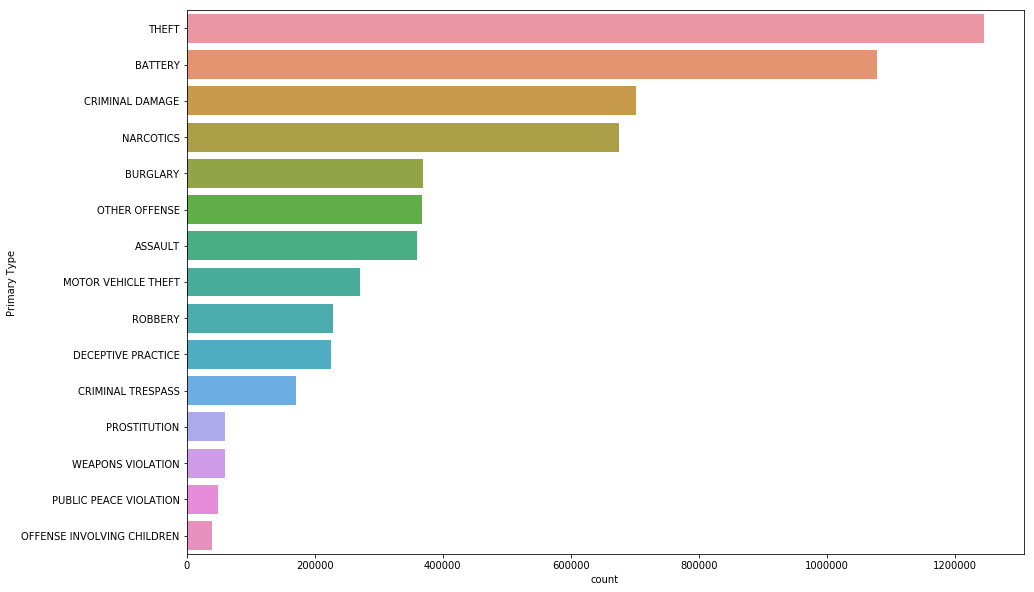

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, 
              order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

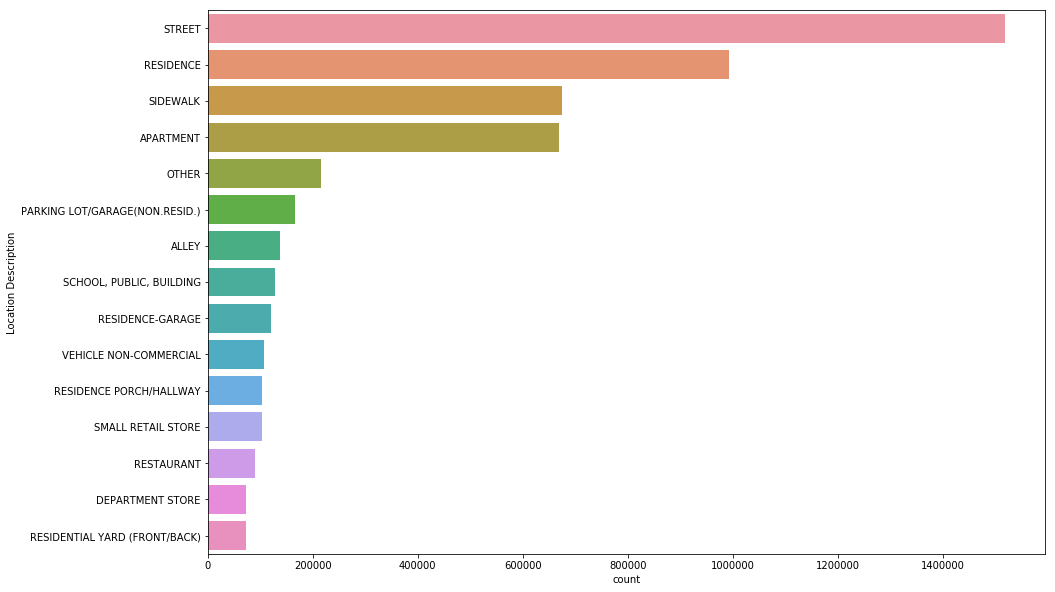

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, 
              order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [18]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

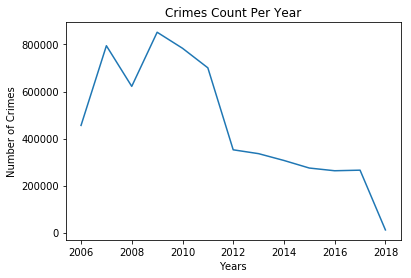

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [20]:
chicago_df.resample('M').size().head(), chicago_df.resample('M').size().tail()

(Date
 2005-01-31    33983
 2005-02-28    32042
 2005-03-31    36970
 2005-04-30    38963
 2005-05-31    40572
 Freq: M, dtype: int64, Date
 2016-09-30    23235
 2016-10-31    23314
 2016-11-30    21140
 2016-12-31    19580
 2017-01-31    11357
 Freq: M, dtype: int64)

Text(0, 0.5, 'Number of Crimes')

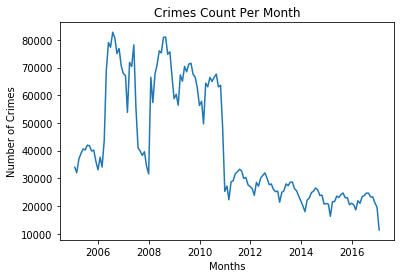

In [21]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [22]:
chicago_df.resample('Q').size().head(),chicago_df.resample('Q').size().tail()

(Date
 2005-03-31    102995
 2005-06-30    119769
 2005-09-30    123550
 2005-12-31    109497
 2006-03-31    115389
 Freq: Q-DEC, dtype: int64, Date
 2016-03-31    60843
 2016-06-30    68085
 2016-09-30    72500
 2016-12-31    64034
 2017-03-31    11357
 Freq: Q-DEC, dtype: int64)

Text(0, 0.5, 'Number of Crimes')

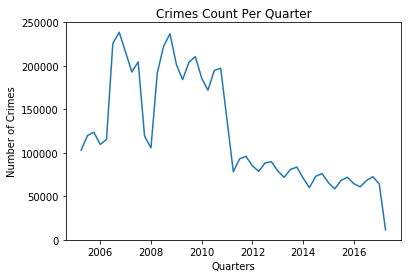

In [23]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [24]:
#grouping the data into monthly buckets

chicago_prophet = chicago_df.resample('M').size().reset_index()

In [25]:
chicago_prophet.head(), chicago_prophet.tail()

(        Date      0
 0 2005-01-31  33983
 1 2005-02-28  32042
 2 2005-03-31  36970
 3 2005-04-30  38963
 4 2005-05-31  40572,           Date      0
 140 2016-09-30  23235
 141 2016-10-31  23314
 142 2016-11-30  21140
 143 2016-12-31  19580
 144 2017-01-31  11357)

In [26]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [27]:
chicago_prophet.head(), chicago_prophet.tail()

(        Date  Crime Count
 0 2005-01-31        33983
 1 2005-02-28        32042
 2 2005-03-31        36970
 3 2005-04-30        38963
 4 2005-05-31        40572,           Date  Crime Count
 140 2016-09-30        23235
 141 2016-10-31        23314
 142 2016-11-30        21140
 143 2016-12-31        19580
 144 2017-01-31        11357)

In [28]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [29]:
chicago_prophet_df.head(),chicago_prophet_df.tail()

(        Date  Crime Count
 0 2005-01-31        33983
 1 2005-02-28        32042
 2 2005-03-31        36970
 3 2005-04-30        38963
 4 2005-05-31        40572,           Date  Crime Count
 140 2016-09-30        23235
 141 2016-10-31        23314
 142 2016-11-30        21140
 143 2016-12-31        19580
 144 2017-01-31        11357)

# STEP #4: MAKE PREDICTIONS

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [31]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [32]:
chicago_prophet_df_final.head(), chicago_prophet_df_final.tail()

(          ds      y
 0 2005-01-31  33983
 1 2005-02-28  32042
 2 2005-03-31  36970
 3 2005-04-30  38963
 4 2005-05-31  40572,             ds      y
 140 2016-09-30  23235
 141 2016-10-31  23314
 142 2016-11-30  21140
 143 2016-12-31  19580
 144 2017-01-31  11357)

In [33]:
m = Prophet()
m.fit(chicago_prophet_df_final)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [39]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60424.697099,39800.678855,72757.031618,60424.697099,60424.697099,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,0.0,0.0,0.0,55602.186301
1,2005-02-28,60293.923673,35445.835795,67292.652139,60293.923673,60293.923673,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,0.0,0.0,0.0,50798.362050
2,2005-03-31,60149.138810,42811.621040,75367.181810,60149.138810,60149.138810,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,0.0,0.0,0.0,58891.800529
3,2005-04-30,60009.024425,44707.755190,78291.247230,60009.024425,60009.024425,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,0.0,0.0,0.0,61130.375194
4,2005-05-31,59864.239561,47718.235769,81650.671969,59864.239561,59864.239561,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,0.0,0.0,0.0,65278.658753


In [40]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
505,2018-01-27,9645.903360,-11538.298918,23966.665726,9513.451436,9804.663509,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,0.0,0.0,0.0,5527.282859
506,2018-01-28,9632.572677,-11430.543967,21734.526623,9499.705719,9791.885896,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,0.0,0.0,0.0,5368.342086
507,2018-01-29,9619.241995,-11492.130930,21935.498105,9485.780295,9779.419397,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,0.0,0.0,0.0,5196.855676
508,2018-01-30,9605.911313,-10291.613358,22849.163072,9472.017699,9766.779586,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,0.0,0.0,0.0,5013.145902
509,2018-01-31,9592.580631,-12622.450641,21863.349787,9458.296722,9753.966360,-4775.092358,-4775.092358,-4775.092358,-4775.092358,-4775.092358,-4775.092358,0.0,0.0,0.0,4817.488273


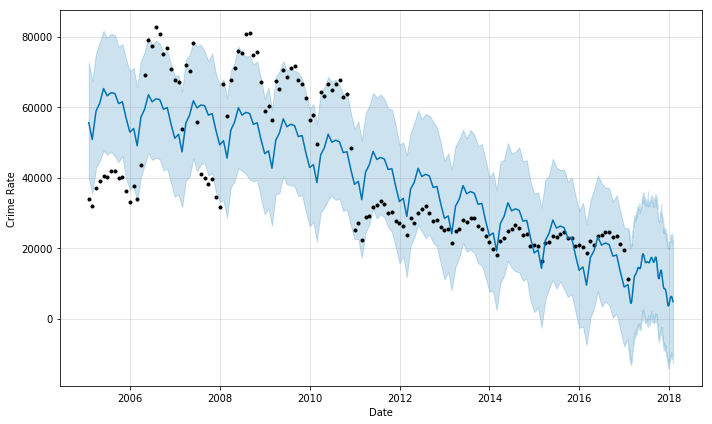

In [36]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

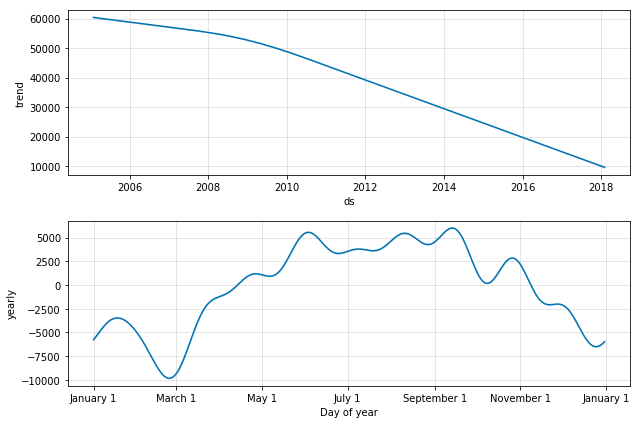

In [37]:
m.plot_components(forecast)